# Microsoft Intern Engage 2022

# Data Analysis Track - To demonstrate how the Automotive Industry can harness data to take informed decisions.

## Predicting estimated carbon dioxide emissions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the dataset

In [3]:
df = pd.read_csv(r"C:\Users\namra\Downloads\FuelConsumption.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


#### Plotting graph between engine size and co2 emissions

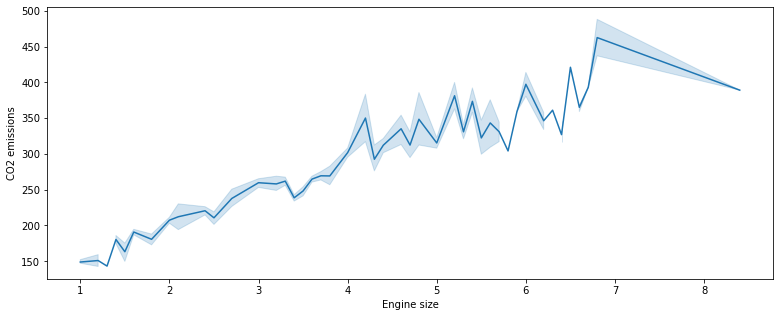

In [4]:
plt.figure(figsize=(13,5)) 
sns.lineplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS']) 
plt.xlabel('Engine size') 
plt.ylabel('CO2 emissions') 
plt.show()
#positive relation between engine size and CO2 emissions. As engine size increases, so does CO2 emissions

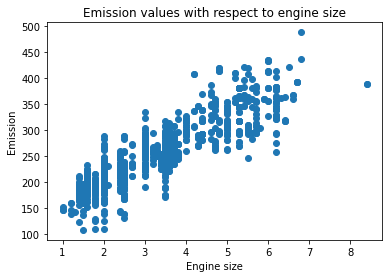

In [5]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title('Emission values with respect to engine size')
plt.show()

In [6]:
from sklearn import linear_model 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error 
from sklearn.model_selection import train_test_split

x = df[['ENGINESIZE']] 
y = df[['CO2EMISSIONS']]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
model = linear_model.LinearRegression()

In [9]:
model.fit(x_train, y_train)

LinearRegression()

In [10]:
print(f'(A) intercept: {model.intercept_} | (B) slope: {model.coef_}')

(A) intercept: [126.28970217] | (B) slope: [[38.99297872]]


In [11]:
y_pred=model.predict(x_test)
y_pred

array([[309.55670218],
       [262.76512771],
       [266.66442558],
       [243.26863835],
       [204.27565962],
       [243.26863835],
       [266.66442558],
       [282.26161707],
       [321.2545958 ],
       [266.66442558],
       [266.66442558],
       [387.54265963],
       [251.06723409],
       [262.76512771],
       [266.66442558],
       [262.76512771],
       [188.67846813],
       [266.66442558],
       [188.67846813],
       [332.95248941],
       [321.2545958 ],
       [196.47706388],
       [251.06723409],
       [270.56372345],
       [243.26863835],
       [196.47706388],
       [204.27565962],
       [188.67846813],
       [340.75108516],
       [251.06723409],
       [336.85178729],
       [219.87285111],
       [196.47706388],
       [321.2545958 ],
       [243.26863835],
       [309.55670218],
       [282.26161707],
       [332.95248941],
       [204.27565962],
       [223.77214899],
       [188.67846813],
       [188.67846813],
       [180.87987239],
       [223

In [12]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

31.399652374309806

In [13]:
r2 = model.score(x_test,y_test)
print(r2)


0.7615595731934374


In [14]:
def predict_co2(e):
    co2 = 126.289 + 38.992*e
    return co2

In [15]:
predict_co2(2)

204.273